## Seaborn Flights Data Set
We use dataset, called the "Flights" dataset, belongs to the Seaborn library. This dataset provides a monthly tally of airline passengers from 1949 to 1960.

In [1]:
import seaborn as sns

flights_df = sns.load_dataset('flights')

flights_df.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [2]:
shape_values = flights_df.shape
print(f"Data set has {shape_values[0]} rows and {shape_values[1]} columns")

Data set has 144 rows and 3 columns


In [3]:
# Know more about dataset using info

flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
flights_df.describe(include= 'all')

,year,month,passengers
count,144.000000,144,144.000000
unique,NaN,12,NaN
top,NaN,Jan,NaN
freq,NaN,12,NaN
mean,1954.500000,NaN,280.298611
std,3.464102,NaN,119.966317
min,1949.000000,NaN,104.000000
25%,1951.750000,NaN,180.000000
50%,1954.500000,NaN,265.500000
75%,1957.250000,NaN,360.500000


In [5]:
print(f"total rows = {len(flights_df)}")

total rows = 144


### Create a line plot that visualizes the monthly passenger counts from 1949 to 1960

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64


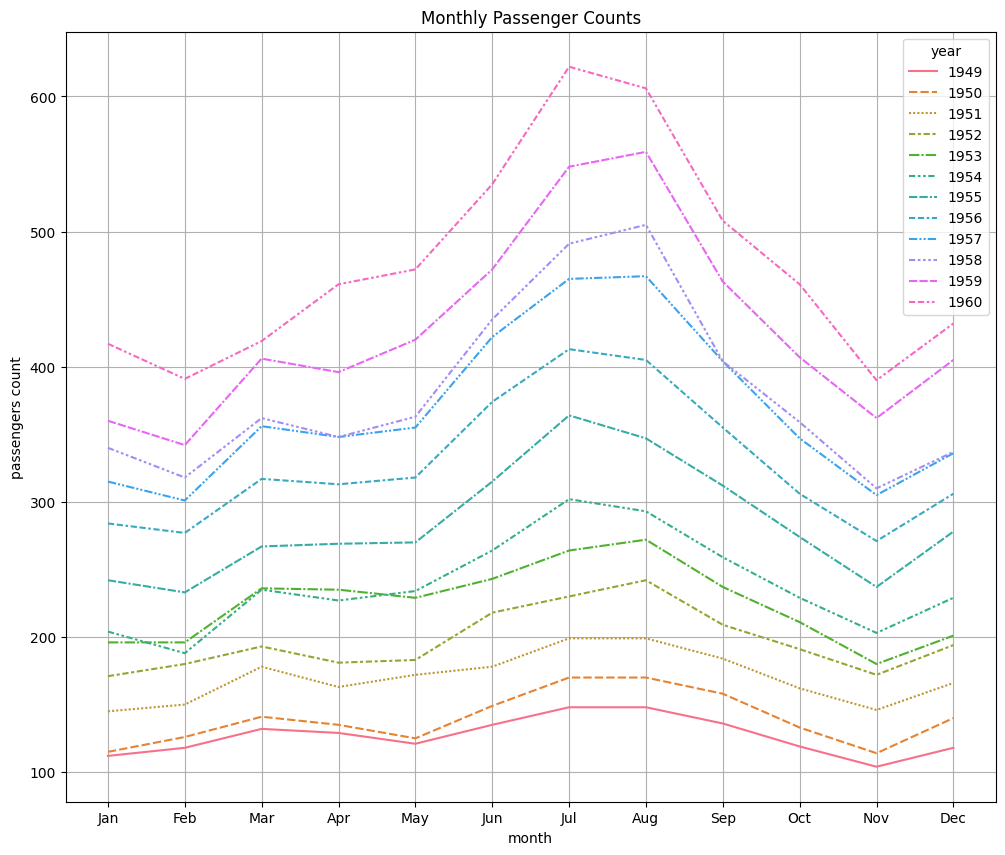

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

flights_df = sns.load_dataset('flights')

print(flights_df.head())

flights_df_pivot = flights_df.pivot(index="month", columns="year", values = "passengers" )

print(flights_df_pivot.head())

#Get the total passenger count for each year
print(flights_df.groupby('year')['passengers'].sum())



plt.figure(figsize=(12, 10))
plt.grid(True)
sns.lineplot(data = flights_df_pivot, linestyle = '--')

plt.title("Monthly Passenger Counts")
plt.xlabel("month")
plt.ylabel("passengers count")
# Display the plot
plt.show()

/var/folders/9q/q3zcglms18n6vqmb1vjys8hm0000gn/T/ipykernel_3632/2771478962.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_wise_data = flights_df.groupby('month')['passengers'].sum().reset_index()


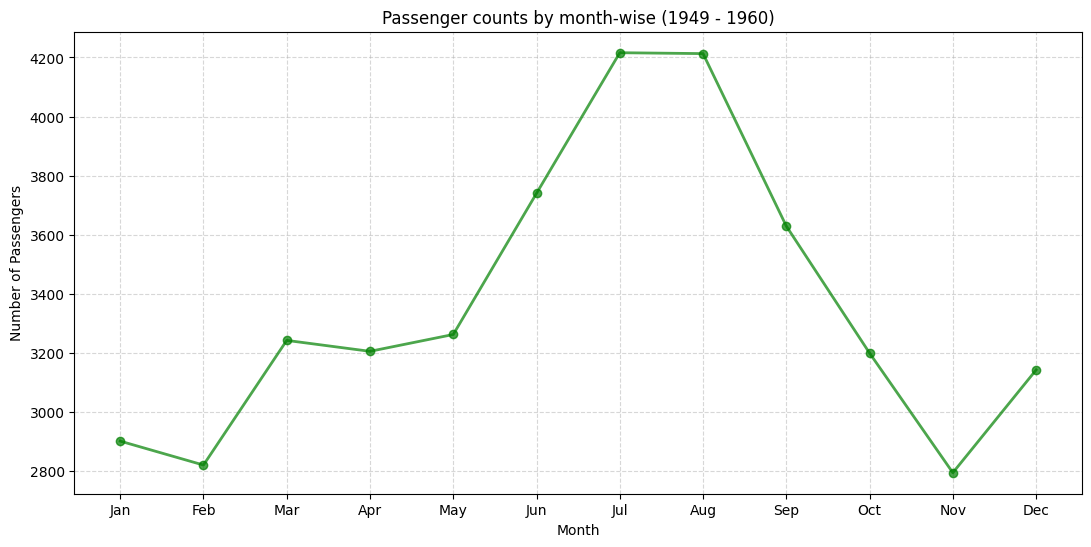

In [7]:
# Month-wise data - line plot

month_wise_data = flights_df.groupby('month')['passengers'].sum().reset_index()
#reset_index() is used after the groupby operation to move the 'month' from the index to a regular column, as by default

# Create line plots

plt.figure(figsize=(13, 6))

plt.plot(month_wise_data['month'], month_wise_data['passengers'], color='green', alpha = 0.7, linewidth =2, marker = 'o')
plt.grid(True, linestyle='--', alpha = 0.5)
plt.title("Passenger counts by month-wise (1949 - 1960)", fontsize = 12)
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.show()

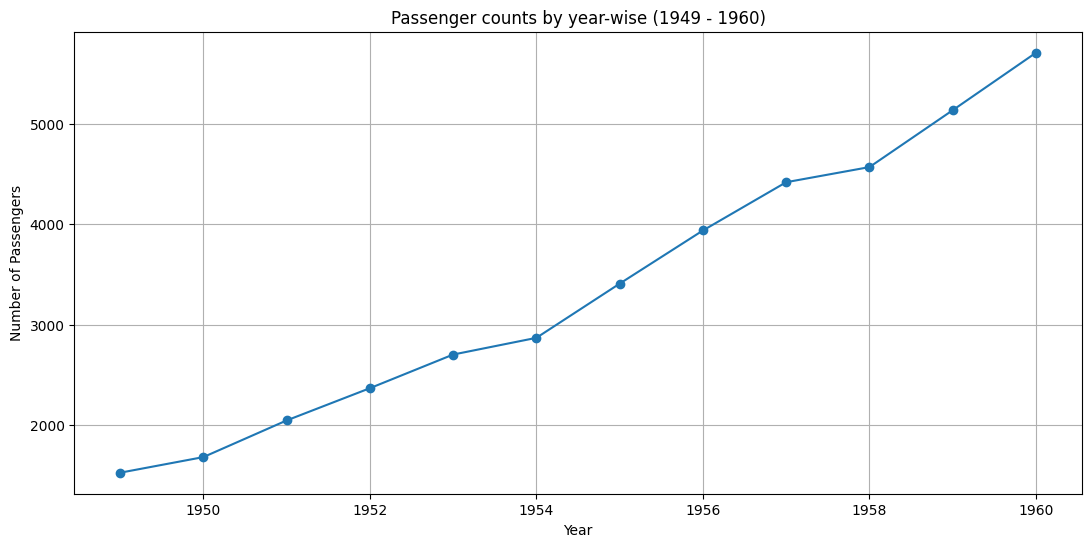

In [8]:
# Year-wise data - line plot

year_wise_data = flights_df.groupby('year')['passengers'].sum()
 
# Create line plots

plt.figure(figsize=(13, 6))

year_wise_data.plot(kind= 'line', marker = 'o')
plt.grid(True)
plt.title("Passenger counts by year-wise (1949 - 1960)", fontsize = 12)
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

### HeatMaps 

* cmap: controls the colormap for the heat map
* annot: If set to True, the data values will be written on each cell in the heat map.
* fmt: string formatting code to use when annot = True
* linewidths: adds lines between each cell in the heatmap.
* cbar: adds a color bar to the heatmap when set to True.
* center: defines the value at which to center the colormap.

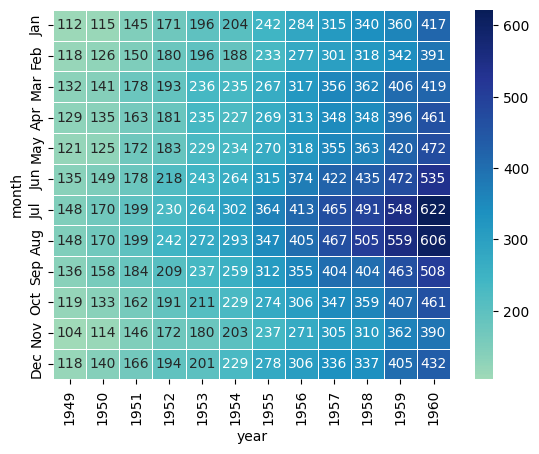

In [16]:
sns.heatmap(flights_df_pivot, annot=True, fmt="d", linewidths=0.5, center=flights_df_pivot.loc['Jan', 1955], cmap='YlGnBu')
plt.show()